# Generalized Watts-Strogatz direct graph on grid with clustering exponent *q* = 2

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
from dgraph import standardize
from lesson1 import averageClustering as ac
from lesson2 import countEdges
from lesson4 import topk
from lesson4 import betweenness
from lesson5 import eigenvector_centrality as ec
from dgraph import GenWSGridGraph
from dgraph import Page_Rank as pr
from dgraph import fill_incoming as fi
from dgraph import Independent_Cascade as ic
from dgraph import toUndirect as und

In [2]:
def independent_cascade(graph, seed, centrality):
    adopters, haters, steps = ic(g, seed)
    print 'Independent Cascade Model: TOP %d %s' % (len(seed), centrality)
    print '\tFinal Adopters:\t', len(adopters)
    print '\tFinal Haters:\t', len(haters)
    print '\t# Iterations:\t', steps
    return len(adopters)

## Set Parameters

In [5]:
NODES = 7056
edges = random.randint(75000, 125000)
radius = 2
weak_ties = [i*5 for i in xrange(0, 3)]
seed = 100

##Create a generalized Watts-Strogatz direct graph on grid with clustering exponent *q* = 2

In [6]:
g = GenWSGridGraph(NODES, edges, radius, weak_ties)
print 'Edges %d\tAverage Clustering = %f' % (countEdges(g)*2,ac(und(g)))
fi(g) # Fill incoming edges dictionary

Edges 86826	Average Clustering = 0.116589


## Execute centrality measures

In [12]:
print 'Page Rank execution...'
pagerank, iterations, err = pr(g, alpha=1.0e-5, eps=1.0e-3)
print iterations, ' iterations. Error:', err
top_pr = [a for a,b in topk(pagerank, seed)]

Page Rank execution...
95  iterations. Error: 0.000980956228394


In [13]:
print 'Eigenvector Centrality...',
ecscores, _ = ec(g)
top_eigenc = [a for a, b in topk(ecscores, seed)]
print 'Done'

Eigenvector Centrality... Done


In [14]:
print 'Betweennes centrality...',
bet = betweenness(g)
top_bet = [a for a, b in topk(bet, seed)]
print 'Done'

Betweennes centrality... Done


## Execute Independent Cascade Model

In [15]:
seed = 100
max_pr_ad = independent_cascade(g, top_pr[:seed], 'Page Rank')
max_eigenc_ad = independent_cascade(g, top_eigenc[:seed], 'Eigenvector')
max_bet_ad = independent_cascade(g, top_bet[:seed], 'Betweenness')

Independent Cascade Model: TOP 100 Page Rank
	Final Adopters:	149
	Final Haters:	6907
	# Iterations:	5
Independent Cascade Model: TOP 100 Eigenvector
	Final Adopters:	264
	Final Haters:	6792
	# Iterations:	7
Independent Cascade Model: TOP 100 Betweenness
	Final Adopters:	287
	Final Haters:	6769
	# Iterations:	5


In [16]:
while seed > 0:
    seed -= 5
    adopters_pr = independent_cascade(g, top_pr[:seed], 'Page Rank')
    if max_pr_ad <= adopters_pr:
        max_pr_ad = adopters_pr
    else:
        break
        

Independent Cascade Model: TOP 95 Page Rank
	Final Adopters:	136
	Final Haters:	6920
	# Iterations:	7


In [17]:
seed = 100
while seed > 0:
    seed -= 5
    adopters_eigenc = independent_cascade(g, top_eigenc[:seed], 'Eigenvector')
    if max_eigenc_ad <= adopters_eigenc:
        max_eigenc_ad = adopters_eigenc
    else:
        break
         

Independent Cascade Model: TOP 95 Eigenvector
	Final Adopters:	249
	Final Haters:	6807
	# Iterations:	8


In [18]:
seed = 100
while seed > 0:
    seed -= 5
    adopters_bet = independent_cascade(g, top_bet[:seed], 'Betweenness')
    if max_bet_ad <= adopters_bet:
        max_bet_ad = adopters_bet
    else:       
        break
    

Independent Cascade Model: TOP 95 Betweenness
	Final Adopters:	270
	Final Haters:	6786
	# Iterations:	8


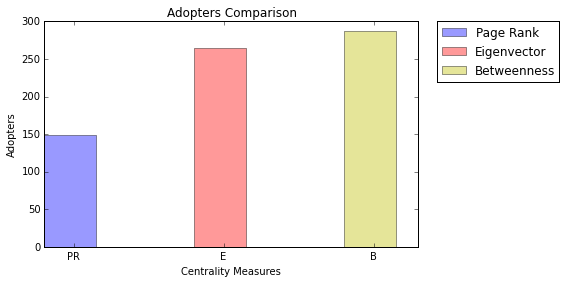

In [19]:
max_adopters = (max_pr_ad, max_eigenc_ad, max_bet_ad)

fig, ax = plt.subplots()

bar_width = 0.35

opacity = 0.4

rects1 = plt.bar(1, max_pr_ad, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Page Rank')

rects2 = plt.bar(2, max_eigenc_ad, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Eigenvector')

rects3 = plt.bar(3, max_bet_ad, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Betweenness')

plt.xlabel('Centrality Measures')
plt.ylabel('Adopters')
plt.title('Adopters Comparison')
plt.xticks([1.2,2.2,3.2], ('PR', 'E', 'B'))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()